In [1]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 71kB 2.1MB/s 


In [2]:
import requests

headers = {
        'Content-Type': 'application/json'
        }
requestResponse = requests.get("https://api.tiingo.com/api/test?token=ef8e37f1745ae4983f9f0dc66d47c12898846a72",
                                    headers=headers)
print(requestResponse.json())
                        

{'message': 'You successfully sent a request'}


In [3]:
import pandas_datareader as pdr


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
df=pdr.get_data_tiingo('AAPL',api_key='ef8e37f1745ae4983f9f0dc66d47c12898846a72')

In [5]:
df.to_csv('AAPL.csv')

In [6]:
df

close    high  ...  divCash  splitFactor
symbol date                                       ...                      
AAPL   2015-07-20 00:00:00+00:00  132.07  132.97  ...      0.0          1.0
       2015-07-21 00:00:00+00:00  130.75  132.92  ...      0.0          1.0
       2015-07-22 00:00:00+00:00  125.22  125.50  ...      0.0          1.0
       2015-07-23 00:00:00+00:00  125.16  127.09  ...      0.0          1.0
       2015-07-24 00:00:00+00:00  124.50  125.74  ...      0.0          1.0
...                                  ...     ...  ...      ...          ...
       2020-07-13 00:00:00+00:00  381.91  399.82  ...      0.0          1.0
       2020-07-14 00:00:00+00:00  388.23  389.02  ...      0.0          1.0
       2020-07-15 00:00:00+00:00  390.90  396.99  ...      0.0          1.0
       2020-07-16 00:00:00+00:00  386.09  389.62  ...      0.0          1.0
       2020-07-17 00:00:00+00:00  385.31  388.59  ...      0.0          1.0

[1259 rows x 12 columns]

In [7]:
import pandas as pd

In [8]:

df=pd.read_csv('AAPL.csv')

In [9]:
import pandas as pd

In [10]:
df.head()
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2020-07-13 00:00:00+00:00,381.91,399.82,381.03,389.06,47913100,381.91,399.82,381.03,389.06,47913100,0.0,1.0
1255,AAPL,2020-07-14 00:00:00+00:00,388.23,389.02,375.51,379.36,42748100,388.23,389.02,375.51,379.36,42748100,0.0,1.0
1256,AAPL,2020-07-15 00:00:00+00:00,390.90,396.99,385.96,395.96,38306900,390.90,396.99,385.96,395.96,38306900,0.0,1.0
1257,AAPL,2020-07-16 00:00:00+00:00,386.09,389.62,383.62,386.25,27645900,386.09,389.62,383.62,386.25,27645900,0.0,1.0
1258,AAPL,2020-07-17 00:00:00+00:00,385.31,388.59,383.36,387.95,23046800,385.31,388.59,383.36,387.95,23046800,0.0,1.0


In [11]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2020-07-13 00:00:00+00:00,381.91,399.82,381.03,389.06,47913100,381.91,399.82,381.03,389.06,47913100,0.0,1.0
1255,AAPL,2020-07-14 00:00:00+00:00,388.23,389.02,375.51,379.36,42748100,388.23,389.02,375.51,379.36,42748100,0.0,1.0
1256,AAPL,2020-07-15 00:00:00+00:00,390.90,396.99,385.96,395.96,38306900,390.90,396.99,385.96,395.96,38306900,0.0,1.0
1257,AAPL,2020-07-16 00:00:00+00:00,386.09,389.62,383.62,386.25,27645900,386.09,389.62,383.62,386.25,27645900,0.0,1.0
1258,AAPL,2020-07-17 00:00:00+00:00,385.31,388.59,383.36,387.95,23046800,385.31,388.59,383.36,387.95,23046800,0.0,1.0


In [12]:
df1=df.reset_index()['close']

In [13]:
df1

0       132.07
1       130.75
2       125.22
3       125.16
4       124.50
         ...  
1254    381.91
1255    388.23
1256    390.90
1257    386.09
1258    385.31
Name: close, Length: 1259, dtype: float64

In [14]:
df1.shape
import numpy as np

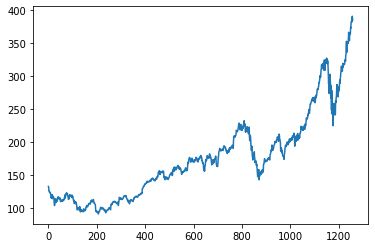

In [15]:

import matplotlib.pyplot as plt
plt.plot(df1)

In [16]:
#df1 has big scaler value so we have to reset it in between 0 to 1
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
print(df1)

[[0.13884083]
 [0.13444903]
 [0.11605004]
 ...
 [1.        ]
 [0.98399654]
 [0.98140138]]


In [18]:
#splitting dataset into train and test and test split
training_size=int(len(df1)*0.65)#0.65 is like perentage of data used in trainsize
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [19]:
training_size,test_size

(818, 441)

In [20]:
len(train_data),len(test_data)

(818, 441)

In [21]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0] #i=0 0,1,2,3------99  100 iterations
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [22]:
#reshape into X=t,t=1,t=2,t=3 and Y=t+4
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,ytest= create_dataset(test_data,time_step)

In [23]:

print(X_train.shape),print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [24]:
print(X_train)#this have 100 feature

[[0.13884083 0.13444903 0.11605004 ... 0.09545515 0.09295981 0.09279345]
 [0.13444903 0.11605004 0.11585041 ... 0.09295981 0.09279345 0.08410966]
 [0.11605004 0.11585041 0.11365451 ... 0.09279345 0.08410966 0.08593958]
 ...
 [0.31930397 0.32369577 0.32213202 ... 0.44566809 0.44393798 0.45425206]
 [0.32369577 0.32213202 0.32612457 ... 0.44393798 0.45425206 0.419284  ]
 [0.32213202 0.32612457 0.32542587 ... 0.45425206 0.419284   0.4129292 ]]


In [25]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

# ** preprocessing is done **

**------------------------**

#  now stacked LSTML starts 

In [26]:
#reshape input to be [samples,time,steps,features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)#to make 23 wala in 3d..so we add 1
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [27]:
#CREAT LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))#this is output
model.compile(loss='mean_squared_error',optimizer='adam')
#have to give a three-dimensional array as an input to your LSTM network. 
#Where the first dimension represents the batch size, the second dimension
# represents the time-steps and the third dimension
# represents the number of units in one input sequence


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 169ms/step - loss: 0.0138 - val_loss: 0.0545
Epoch 2/100
12/12 [==============================] - 1s 74ms/step - loss: 0.0027 - val_loss: 0.0035
Epoch 3/100
12/12 [==============================] - 1s 74ms/step - loss: 7.6374e-04 - val_loss: 0.0033
Epoch 4/100
12/12 [==============================] - 1s 73ms/step - loss: 5.6054e-04 - val_loss: 0.0044
Epoch 5/100
12/12 [==============================] - 1s 73ms/step - loss: 4.4494e-04 - val_loss: 0.0049
Epoch 6/100
12/12 [==============================] - 1s 73ms/step - loss: 4.0820e-04 - val_loss: 0.0032
Epoch 7/100
12/12 [==============================] - 1s 73ms/step - loss: 4.0263e-04 - val_loss: 0.0037
Epoch 8/100
12/12 [==============================] - 1s 74ms/step - loss: 3.8063e-04 - val_loss: 0.0038
Epoch 9/100
12/12 [==============================] - 1s 73ms/step - loss: 3.7993e-04 - val_loss: 0.0031
Epoch 10/100
12/12 [==============================] - 1s 72ms/step - lo

In [31]:
import tensorflow as tf


In [32]:
tf.__version__

'2.2.0'

In [33]:
#lets do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [34]:
#transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
### calculate RMSE perform metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

148.45300632660826

In [36]:
### test data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))
import numpy as np

In [37]:
### PLOTTING
# shift trian prediction for plotting 
look_back=100#time steps
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict



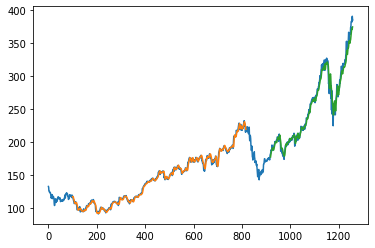

In [38]:
#shift test prediction for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**ORANGE LINE IS TRAIN DATA AND GREEN IS TEST DATA**

*now to predict future 30 days and plot the output*

In [39]:
len(test_data)#no of record

441

In [40]:
x_input = test_data[341:].reshape(1,-1)#we took last previous 100 days record to train


In [41]:
x_input.shape

(1, 100)

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [43]:
len(temp_input)

100

In [44]:
temp_input#this is 101 output we have to take 100

[0.6731101943039659,
 0.6094623369709875,
 0.608929997338302,
 0.6936052701623637,
 0.6620308756986958,
 0.7066808623902051,
 0.6740085174341232,
 0.661066010114453,
 0.5850079850944904,
 0.6487889273356402,
 0.6158171413361726,
 0.5253194037796114,
 0.6242680330050574,
 0.5052901250998137,
 0.5407239819004526,
 0.5201290923609263,
 0.5138408304498271,
 0.46213734362523295,
 0.4459342560553634,
 0.5208277881288262,
 0.5163029012509982,
 0.5592893265903647,
 0.5236891136545117,
 0.547211871173809,
 0.5454817673675806,
 0.5009648655842428,
 0.5143398988554699,
 0.5026284269363854,
 0.5726976310886347,
 0.5625831780676073,
 0.5846752728240618,
 0.5910633484162897,
 0.6085640138408306,
 0.6544783071599682,
 0.6457612456747406,
 0.6532805429864255,
 0.6403380356667555,
 0.6208078253926006,
 0.5923276550439182,
 0.6180463135480438,
 0.6144862922544584,
 0.6409036465264841,
 0.6415690710673411,
 0.6262975778546713,
 0.6567407505988823,
 0.6769363854138942,
 0.6611990950226245,
 0.674807026883

In [63]:
#demonstrate nxt 10 days prediction
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<100):
    if (len(temp_input)>100):
    #print(temp_input)

          x_input=np.array(temp_input[1:])
          print("{} day input {}".format(i,x_input))
          x_input=x_input.reshape(1,-1)#it is always better to reshape the new data
          x_input=x_input.reshape((1,n_steps,1))

          #print(x_input)
          yhat = model.predict(x_input,verbose=0)
          print("{} day output {}".format(i,yhat))
          temp_input.extend(yhat[0].tolist())
          temp_input=temp_input[1:]
          #print(temp_input)
          lst_output.extend(yhat.tolist())
          i=i+1
    else:
          x_input=x_input.reshape((1,n_steps,1))
          yhat = model.predict(x_input,verbose=0)
          print(yhat[0])
          temp_input.extend(yhat[0].tolist())
          print(len(temp_input))
          lst_output.extend(yhat.tolist())
          i=i+1
print(lst_output)




0 day input [0.58467527 0.59106335 0.60856401 0.65447831 0.64576125 0.65328054
 0.64033804 0.62080783 0.59232766 0.61804631 0.61448629 0.64090365
 0.64156907 0.62629758 0.65674075 0.67693639 0.6611991  0.67480703
 0.68944637 0.69966063 0.71000799 0.7312683  0.74750466 0.73552702
 0.72301703 0.7293053  0.72321666 0.7473383  0.74128294 0.76154512
 0.75362656 0.76041389 0.75322731 0.75781874 0.75828454 0.75725313
 0.77026218 0.77521959 0.78114187 0.77182592 0.80236891 0.80889007
 0.84392467 0.87336971 0.81700825 0.82665691 0.84059755 0.8708411
 0.86921081 0.8696766  0.86298909 0.89343226 0.91891802 0.89739154
 0.91329518 0.87599814 0.90311419 0.9131621  0.91086638 0.91086638
 0.94327256 0.9394131  0.96829252 0.973749   0.97597817 0.97008917
 0.99111658 1.         0.98399654 0.98140138 0.94105524 0.92290413
 0.90286428 0.88573194 0.87267047 0.8636834  0.85828847 0.85572243
 0.85507864 0.85543656 0.85596848 0.85602093 0.85515779 0.85317045
 0.85006052 0.84599537 0.84125358 0.83616692 0.8310

In [64]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [65]:
import matplotlib.pyplot as plt

In [66]:
len(df1)

1259

In [67]:
df3=df1.tolist()
df3.extend(lst_output)

In [68]:
len(df1)

1259

ValueError: ignored

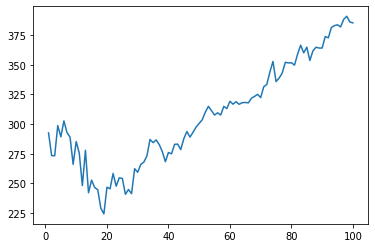

In [69]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
#orange line is the 30 days future 

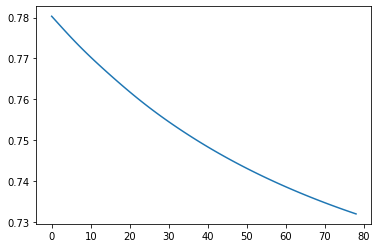

In [70]:
plt.plot(df3[1280:])

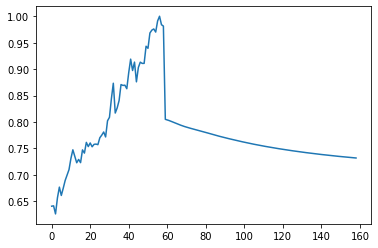

In [71]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])